# S14 T01: Tarea base de datos NoSQL

## Descripción
Empecemos a familiarizarnos con bases de datos NoSQL !!! Empecemos con varios ejercicios básicos
___


In [1]:
# Libraries and Modules
import sys
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from pymongo import MongoClient
import json

## Nivel 1
### - Ejercicio 1
Crear una base de datos NoSQL utilizando MongoDB. Añádele algunos datos de ejemplo que te permitan comprobar que eres capaz de procesar la información de forma básica.
___
Para el ejercicio 1 se genero una base de datos sencilla primeramente en la command shell de mongo:
<br>

Primeramente se configuro MongoDB

In [2]:
Image(url="mongo1.png")

Para crear una base de datos y sus documentos, existen diferentes opciones, una de ellas es generarla desde la mongo shell. Por lo que, para fines de practica, primero se procedio a utilizar el mongo shell para crear la primera base de datos para el ejercicio, entre la serie de comandos que se realizaron fueron: 
- creación de una base de datos
- revisar que bases de datos existen
- seleccionar base de datos
- generar colecciones y documentos dentro de la base de datos 
- busquedas sencillas en la base de datos
- busquedas que cumplen una condición dada
- modificacion de datos ya introducidos
- eliminar datos
los comandos y datos introducidos son los siguientes:
<br>

*nota: el siguiente codigo es lo que fue introducido en el mongo shell, por lo que no se ejecuta dentro de jn.*
<br> https://www.youtube.com/watch?v=2QQGWYe7IDU&ab_channel=TraversyMedia

In [4]:
Microsoft Windows [Version 10.0.19043.1645]
(c) Microsoft Corporation. All rights reserved.

#review version of mongo
C:\Users\Usuario>mongosh --version
1.3.1

#connect mongo and create first database
C:\Users\Usuario>mongosh "mongodb+srv://cluster0.4aw1h.mongodb.net/myFirstDatabase" --apiVersion 1 --username yovanna --password itacademy1
Current Mongosh Log ID: 62670330d3c5867132bab574
Connecting to:          mongodb+srv://cluster0.4aw1h.mongodb.net/myFirstDatabase?appName=mongosh+1.3.1
Using MongoDB:          5.0.7 (API Version 1)
Using Mongosh:          1.3.1

For mongosh info see: https://docs.mongodb.com/mongodb-shell/


To help improve our products, anonymous usage data is collected and sent to MongoDB periodically (https://www.mongodb.com/legal/privacy-policy).
You can opt-out by running the disableTelemetry() command.

#review de current database
Atlas atlas-11bw70-shard-0 [primary] myFirstDatabase> db
myFirstDatabase

#review existing databases
Atlas atlas-11bw70-shard-0 [primary] myFirstDatabase> show dbs
S14_T01  8.19 kB
admin     311 kB
local    1.42 GB

#select database to use
Atlas atlas-11bw70-shard-0 [primary] myFirstDatabase> use test_db
Atlas atlas-11bw70-shard-0 [primary] test_db>

#create a new collection in the database
Atlas atlas-11bw70-shard-0 [primary] test_db> db.createCollection("users")
{ ok: 1 }

#insert a new document with basic information (insert one command)
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.insertOne({name:"yovanna", lastname:"valencia", age:31, weigth:65, heigth:167})
{
  acknowledged: true,
  insertedId: ObjectId("6267044573b133c13294797f")
}

#insert a more documents (insert many command)
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.insertMany([{name:"Benjamin", lastname:"Guiraud", age:33, weigth:90, heigheigth:198},
... {name:"Yulianna", lastname:"Barba", age:29, weigth:55, heigth:163},
... {name:"Ezequiel", lastname:"Aguirre", age:31, weigth:80, heigth:190},
... {name:"Aline", lastname:"Aguirre", age:32, weigth:60, heigth:163},
... ])
{
  acknowledged: true,
  insertedIds: {
    '0': ObjectId("626705b673b133c132947980"),
    '1': ObjectId("626705b673b133c132947981"),
    '2': ObjectId("626705b673b133c132947982"),
    '3': ObjectId("626705b673b133c132947983")
  }
}

#search collection (command find)
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find()
[
  {
    _id: ObjectId("6267044573b133c13294797f"),
    name: 'yovanna',
    lastname: 'valencia',
    age: 31,
    weigth: 65,
    heigth: 167,
  },
  {
    _id: ObjectId("626705b673b133c132947980"),
    name: 'Benjamin',
    lastname: 'Guiraud',
    age: 33,
    weigth: 90,
    heigth: 198,
  },
  {
    _id: ObjectId("626705b673b133c132947981"),
    name: 'Yulianna',
    lastname: 'Barba',
    age: 29,
    weigth: 55,
    heigth: 163,
  },
  {
    _id: ObjectId("626705b673b133c132947982"),
    name: 'Ezequiel',
    lastname: 'Aguirre',
    age: 31,
    weigth: 80,
    heigth: 190,
  },
  {
    _id: ObjectId("626705b673b133c132947983"),
    name: 'Aline',
    lastname: 'Aguirre',
    age: 32,
    weigth: 60,
    heigth: 163,
  }
]

#Search for a specific piece of information
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find({name:"Yulianna"})
[
  {
    _id: ObjectId("626705b673b133c132947981"),
    name: 'Yulianna',
    lastname: 'Barba',
    age: 29,
    weigth: 55,
    heigth: 163,
]

#search for the number of users with specific characteristics
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find({age:31}).count()
2

#find the first document that fullfils the condition
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.findOne({age:{$gt:30}})
{
  _id: ObjectId("6267044573b133c13294797f"),
  name: 'yovanna',
  lastname: 'valencia',
  age: 31,
  weigth: 65,
  heigth: 167,
}

#find all the users that fullfill the condition
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find({age:{$gt:30}})
[
  {
    _id: ObjectId("6267044573b133c13294797f"),
    name: 'yovanna',
    lastname: 'valencia',
    age: 31,
    weigth: 65,
    heigth: 167,
  },
  {
    _id: ObjectId("626705b673b133c132947980"),
    name: 'Benjamin',
    lastname: 'Guiraud',
    age: 33,
    weigth: 90,
    heigth: 198,
  },
  {
    _id: ObjectId("626705b673b133c132947982"),
    name: 'Ezequiel',
    lastname: 'Aguirre',
    age: 31,
    weigth: 80,
    heigth: 190,
  },
  {
    _id: ObjectId("626705b673b133c132947983"),
    name: 'Aline',
    lastname: 'Aguirre',
    age: 32,
    weigth: 60,
    heigth: 163,
  }
]

#update specific data in a document
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.updateOne({name:"Aline}, {$set {lastname:"Romero}})
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find({name:"Aline"})
[
  {cknowledged: true,
    _id: ObjectId("626705b673b133c132947983"),
    name: 'Aline',
    lastname: 'Romero',
    age: 32,unt: 0
    weigth: 60,
    heigth: 163,
  }
]

#insert new if not find
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.updateOne({name:"Lorena"},{$set: {lastname:"Lopez",age:28, weigth:58,heigth:165,profession:["nutricionist"]}},{upsert:true})
{
  acknowledged: true,
  insertedId: ObjectId("62670a5346aca8efd666f87f"),
  matchedCount: 0,
  modifiedCount: 0,
  upsertedCount: 1
}

#increment all the ages in the database by 1
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.updateMany({},{$inc:{age:1}})
{
  acknowledged: true,
  insertedId: null,
  matchedCount: 6,
  modifiedCount: 6,
  upsertedCount: 0
}
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.find()
[
  {
    _id: ObjectId("6267044573b133c13294797f"),
    name: 'yovanna',
    lastname: 'valencia',
    age: 32,
    weigth: 65,
    heigth: 167,
  },
  {
    _id: ObjectId("626705b673b133c132947980"),
    name: 'Benjamin',
    lastname: 'Guiraud',
    age: 34,
    weigth: 90,
    heigth: 198,
  },
  {
    _id: ObjectId("626705b673b133c132947981"),
    name: 'Yulianna',
    lastname: 'Barba',
    age: 30,
    weigth: 55,
    heigth: 163,
  },
  {
    _id: ObjectId("626705b673b133c132947982"),
    name: 'Ezequiel',
    lastname: 'Aguirre',
    age: 32,
    weigth: 80,
    heigth: 190,
  },
  {
    _id: ObjectId("626705b673b133c132947983"),
    name: 'Aline',
    lastname: 'Romero',
    age: 33,
    weigth: 60,
    heigth: 163,
  },
  {
    _id: ObjectId("62670a5346aca8efd666f87f"),
    name: 'Lorena',
    age: 29,
    heigth: 165,
    lastname: 'Lopez',
    weigth: 58
  }
]

#delete a document
Atlas atlas-11bw70-shard-0 [primary] test_db> db.users.deleteOne({name:"Lorena"})
{ acknowledged: true, deletedCount: 1 }


SyntaxError: invalid syntax (<ipython-input-4-880049dc508c>, line 1)

Ahora dentro del programa MongoDB se observa que ya tenemos la base de datos creada desde el shell:

In [3]:
Image(url="mongo2.1.png")

Tambien se puede agregar informacion dentro del UI directamente en la opcion: **Insert document** y agregamos una nueva entrada:

In [4]:
Image(url="mongo3.png")

Tambien dentro de la misma interface podemos hacer busquedas filtradas como las realizadas en el shell:

In [5]:
Image(url="mongo4.png")

### - Ejercicio 2
Conecta la base de datos NoSQL a Python utilizando por ejemplo pymongo.

In [2]:
#MongDB connection with pymongo
Client = MongoClient('localhost',27017)

In [3]:
#check the databases available
Client.list_database_names()

['admin', 'config', 'local', 'test_db']

In [23]:
#select required db
db=Client.test_db

In [24]:
#check the collections available
collect_names = db.list_collection_names()
collect_names

['users']

In [25]:
#select the collection users
collection = db.get_collection("users")

## Nivel 2
### - Ejercicio 1
Carga algunas consultas sencillas a un Pandas Dataframe. 

In [26]:
# We create a dataframe with the data of the last collection created
users_df = pd.DataFrame(list(collection.find()))
users_df

,_id,name,lastname,age,weigth,heigth,hour_play
0,6267044573b133c13294797f,Yovanna,Valencia,32,65,167,20
1,626705b673b133c132947980,Benjamin,Guiraud,34,90,198,44
2,626705b673b133c132947981,Yulianna,Barba,30,55,163,28
3,626705b673b133c132947982,Ezequiel,Aguirre,32,80,190,55
4,626705b673b133c132947983,Aline,Romero,33,60,163,18
5,62670bf1af73e02b31d3d8e3,Lorena,Lopez,29,58,166,5


Se genera una query para obtener los usuarios de mayor edad en el database:

In [27]:
#simple query to filter by age
query = {'age':{'$gte':31}}

In [28]:
high_age = collection.find(query)

In [29]:
high_db = pd.DataFrame(list(high_age))
high_db

,_id,name,lastname,age,weigth,heigth,hour_play
0,6267044573b133c13294797f,Yovanna,Valencia,32,65,167,20
1,626705b673b133c132947980,Benjamin,Guiraud,34,90,198,44
2,626705b673b133c132947982,Ezequiel,Aguirre,32,80,190,55
3,626705b673b133c132947983,Aline,Romero,33,60,163,18


Se ordenan los datos por horas de juego:

In [38]:
high_db.sort_values(by='hour_play',ascending=False)

,_id,name,lastname,age,weigth,heigth,hour_play
2,626705b673b133c132947982,Ezequiel,Aguirre,32,80,190,55
1,626705b673b133c132947980,Benjamin,Guiraud,34,90,198,44
0,6267044573b133c13294797f,Yovanna,Valencia,32,65,167,20
3,626705b673b133c132947983,Aline,Romero,33,60,163,18


## Nivel 3
### - Ejercicio 1
Genera un resumen estadístico de la información contenida en la base de datos.

In [30]:
#stadistic resume of the numerical variables
users_df.describe().round(2)

,age,weigth,heigth,hour_play
count,6.00,6.00,6.00,6.00
mean,31.67,68.00,174.50,28.33
std,1.86,13.93,15.40,18.32
min,29.00,55.00,163.00,5.00
25%,30.50,58.50,163.75,18.50
50%,32.00,62.50,166.50,24.00
75%,32.75,76.25,184.25,40.00
max,34.00,90.00,198.00,55.00


Se hace un grafico para explorar la relacion entre el peso y la altura de los usarios:

<AxesSubplot:xlabel='weigth', ylabel='heigth'>

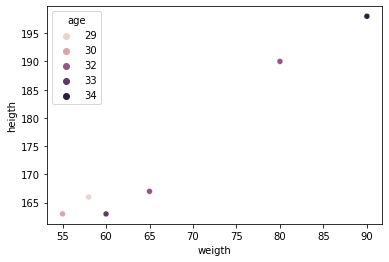

In [31]:
#categorical plot observing the relation within weigth and heigth
sns.scatterplot(x=users_df['weigth'],y=users_df['heigth'], hue=users_df['age'])

Y ahora se exploda una relación entre todas las variables numericas:

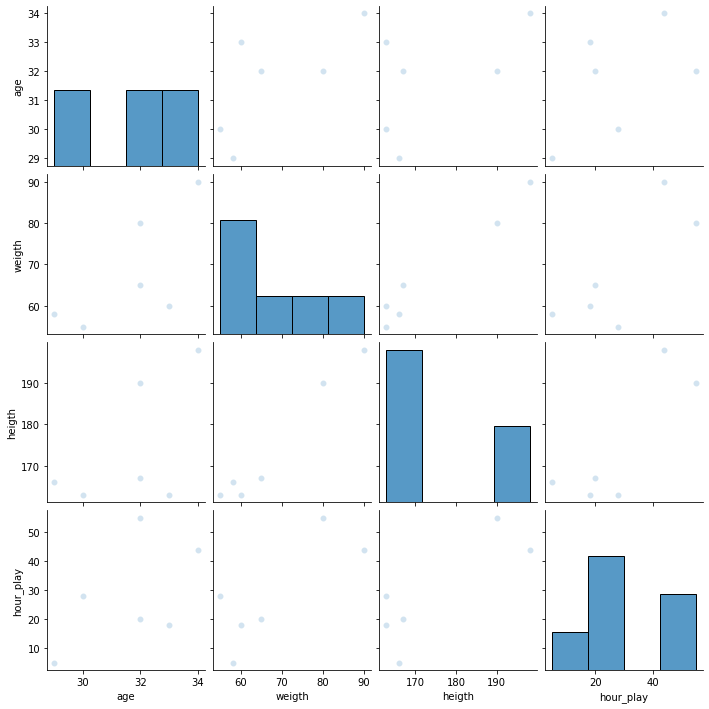

In [32]:
#Matrix Plot all numerical variables
sns.pairplot(users_df, diag_kind='hist', plot_kws={'alpha': 0.2})